# SETUP 

In [1]:
import sys
import os
from pathlib import Path 
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import torch

modulepath = Path.cwd().parent / "utils"
modulepath = str(modulepath)
projectpath = Path.cwd().parent
projectpath = str(projectpath)
if modulepath not in sys.path:
    sys.path.insert(0,str(modulepath))
if projectpath not in sys.path:
    sys.path.insert(0,str(projectpath))  
print(sys.path)

['c:\\Users\\oriol\\GitHub_Repos\\CNN-classification', 'c:\\Users\\oriol\\GitHub_Repos\\CNN-classification\\utils', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\python312.zip', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\DLLs', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\Lib', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch', '', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\Lib\\site-packages', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\Lib\\site-packages\\win32', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch\\Lib\\site-packages\\Pythonwin']


In [2]:
from utils.data_loaders import create_train_test_dataloaders
transform = v2.Compose([v2.RandomCrop(size=(20, 20))])#,v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])


In [4]:
train_basic,test_basic = create_train_test_dataloaders(dataset_name="FashionMNIST",size=0.1)
train_augmented,test_augmented = create_train_test_dataloaders(dataset_name="FashionMNIST",transform=transform)
img_basic,label_basic = next(iter(train_basic))
img_augmented,label_augmented = next(iter(train_augmented))

32


In [4]:
train_basic,test_basic = create_train_test_dataloaders("some spaces are good")

print(train_basic.dataset.root.split("\\")[-1])
name = os.path.split(os.path.normpath(train_basic.dataset.root))[-1]
print(name)

some spaces are good
some spaces are good


(np.float64(-0.5), np.float64(19.5), np.float64(19.5), np.float64(-0.5))

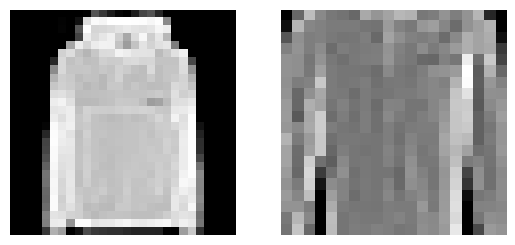

In [5]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(img_basic[0].permute(1,2,0),cmap="gray")
ax[1].imshow(img_augmented[0].permute(1,2,0),cmap="gray")
ax[0].axis(False)
ax[1].axis(False)

In [6]:
img_basic.shape

torch.Size([32, 1, 28, 28])

In [7]:
from utils.model_architectures import TinyVGG_1
from torchinfo import summary 

tvgg = TinyVGG_1(1,20,10)

In [8]:
summary(tvgg,input_size=[32,1,28,28])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG_1                                [32, 10]                  --
├─Sequential: 1-1                        [32, 20, 12, 12]          --
│    └─Conv2d: 2-1                       [32, 20, 26, 26]          200
│    └─ReLU: 2-2                         [32, 20, 26, 26]          --
│    └─Conv2d: 2-3                       [32, 20, 24, 24]          3,620
│    └─ReLU: 2-4                         [32, 20, 24, 24]          --
│    └─MaxPool2d: 2-5                    [32, 20, 12, 12]          --
├─Sequential: 1-2                        [32, 20, 4, 4]            --
│    └─Conv2d: 2-6                       [32, 20, 10, 10]          3,620
│    └─ReLU: 2-7                         [32, 20, 10, 10]          --
│    └─Conv2d: 2-8                       [32, 20, 8, 8]            3,620
│    └─ReLU: 2-9                         [32, 20, 8, 8]            --
│    └─MaxPool2d: 2-10                   [32, 20, 4, 4]            --
├─Seq

In [9]:
tvgg.cpu()
tvgg.forward(img_basic[0].unsqueeze(dim=0))
torch.softmax(tvgg.forward(img_basic[0].unsqueeze(dim=0)),1)

#next(tvgg.parameters()).is_cuda #check if model on cuda

tensor([[0.1039, 0.0984, 0.0970, 0.0983, 0.0958, 0.0985, 0.1001, 0.1020, 0.1042,
         0.1018]], grad_fn=<SoftmaxBackward0>)

In [8]:
from utils.engine import train
from utils.model_architectures import TinyVGG_1
from utils.data_loaders import create_train_test_dataloaders
from torch import nn
from utils.helpers import create_writer
from utils.helpers import create_experiment_metadata
train_dataloader, test_dataloader = create_train_test_dataloaders(size=0.1) #type: ignore
    
device = "cuda" if torch.cuda.is_available() else "cpu"

model_0 = TinyVGG_1(input_shape=1,hidden_channels=10,output_shape=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)
#print(f"Is the model on GPU {next(model_0.parameters()).is_cuda}")

model_name = model_0._get_name()
experiment_name = "Test_small_dataset"
extra = "1 epochs"
NUM_EPOCHS = 1

writer = create_writer(experiment_name=experiment_name,model_name=model_name,extra=extra)

train(model=model_0,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,loss_fn=loss_fn,epochs=NUM_EPOCHS,writer=writer)


[INFO] Created SummaryWriter, saving to: c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\runs\TinyVGG_1\Test_small_dataset\1 epochs...
[INFO] Created experiment metadata, saving to: c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\runs_metadata\TinyVGG_1\Test_small_dataset\1 epochs...


  0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
from utils.data_loaders import create_train_test_dataloaders
from torchvision import datasets 
from utils.config import DATA_DIRECTORY
mnist = os.path.join(DATA_DIRECTORY,"FashionMNIST")
train_dataset = datasets.FashionMNIST(root=mnist,train=True,download=False,transform=v2.Compose([v2.ToImage(),v2.ToDtype(torch.float32, scale=True)]))
train_basic,test_basic = create_train_test_dataloaders("FashionMNIST")


In [ ]:
print(f"Initial len {len(train_dataset)}, initial type {type(train_dataset)}")
size = 0.1
nel = int(len(train_dataset)*size)
train_dataset.data = train_dataset.data[0:nel]
print(f"Final len {len(train_dataset)}, final type {type(train_dataset)}")


Initial len 600, initial type <class 'torchvision.datasets.mnist.FashionMNIST'>
470400
Final len 60, final type <class 'torchvision.datasets.mnist.FashionMNIST'>


In [2]:
from utils.config import RUNS_METADATA_DIRECTORY
from utils.config import METADATA_FILENAME

def retrieve_metadata(model_name:str, experiment_name:str, extra=None):
    """AAA"""
    if extra:
        metadata_path = os.path.join(RUNS_METADATA_DIRECTORY, model_name, 
                               experiment_name, extra, METADATA_FILENAME)
    else:
        metadata_path = os.path.join(RUNS_METADATA_DIRECTORY, model_name, 
                               experiment_name, METADATA_FILENAME)
    if os.path.exists(metadata_path):
        with open(metadata_path, 'rb') as file:
            metadata = pickle.load(file)
        return metadata
    else:
        print(f"No metadata stored in {metadata_path}")

In [8]:

meta_dict = retrieve_metadata(model_name="TinyVGG_1", experiment_name="iwhrsgir", extra="3 epochs SDG")


No metadata stored in c:\Users\oriol\GitHub_Repos\CNN-classification\runs_metadata\TinyVGG_1\iwhrsgir\3 epochs SDG\Metadata.pkl


In [7]:
print(meta_dict)

{'date': '20-08-2025', 'experiment name': 'Test_writer_and_metadata', 'model name': 'TinyVGG_1', 'learning rate': 0.01, 'epochs': 3, 'loss function': 'CrossEntropyLoss', 'optimizer name': 'SGD', 'dataset': 'some spaces are good', 'training dataset size': 60000, 'testing dataset size': 10000, 'batch size': 32, 'optimizer params': {'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None}, 'model params': {'layer_1': Sequential(
  (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), 'layer_2': Sequential(
  (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fals

In [71]:
from utils.config import RUNS_DIRECTORY
print(RUNS_DIRECTORY)
exlog = os.path.dirname(RUNS_DIRECTORY)
print(exlog)
if exlog not in sys.path:
    sys.path.insert(0,str(exlog))
print(sys.path)

c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\runs
c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs
['c:\\Users\\oriol\\GitHub_Repos\\CNN-classification\\experiment_logs', 'c:\\Users\\oriol\\GitHub_Repos\\CNN-classification\\experiment_logs\\runs', 'c:\\Users\\oriol\\GitHub_Repos\\CNN-classification', 'c:\\Users\\oriol\\GitHub_Repos\\CNN-classification\\utils', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\python312.zip', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\DLLs', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\Lib', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126', '', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\Lib\\site-packages', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\Lib\\site-packages\\win32', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\oriol\\anaconda3\\envs\\pytorch_cu126\\Lib\\site-packages\\Pythonwin']


In [ ]:
from utils.engine import train
from utils.model_architectures import TinyVGG_1
from utils.data_loaders import create_train_test_dataloaders
from torch import nn
from utils.helpers import create_writer
from utils.helpers import create_experiment_metadata
train_dataloader, test_dataloader = create_train_test_dataloaders()

device = "cuda" if torch.cuda.is_available() else "cpu"

model_0 = TinyVGG_1(input_shape=1,hidden_channels=10,output_shape=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
optimizer.__getstate__()['defaults']

In [ ]:
model_0.__getstate__()['_modules']

In [ ]:
import pickle
with open(r"C:\Users\oriol\GitHub_Repos\CNN-classification\runs_metadata\TinyVGG_1\Test_writer_and_dict\2 epochs\Metadata.pkl", 'rb') as file:
    meta_dict = pickle.load(file)

In [ ]:
print(meta_dict)

In [ ]:
wrtr.__getstate__()['log_dir']

In [ ]:
import os
from utils.config import RUNS_DIRECTORY
from utils.helpers import create_writer
wrtr = create_writer(model_name="None",experiment_name="Test expname extraction",extra="Please")

relpath = os.path.normpath(os.path.relpath(wrtr.__getstate__()['log_dir'],RUNS_DIRECTORY))
components = relpath.split(os.sep)

In [ ]:
print(f"Model name '{components[0]}' and experiment name '{components[1]}'")
type(components[0])

In [ ]:
from utils.model_architectures import TinyVGG_1

device = "cuda" if torch.cuda.is_available() else "cpu"

model_0 = TinyVGG_1(input_shape=1,hidden_channels=10,output_shape=10).to(device)

In [ ]:
from utils.config import RUNS_METADATA_DIRECTORY
dictpath = os.path.join(RUNS_METADATA_DIRECTORY,relpath)
print(dictpath)

In [ ]:
import os
from utils.config import RUNS_METADATA_DIRECTORY
import pickle
metadata_file = os.path.join(RUNS_METADATA_DIRECTORY,"TinyVGG_1","Test_writer_and_newdict","1 epochs","Metadata.pkl")
with open(metadata_file, 'rb') as f:
    resdict = pickle.load(f)

In [10]:
from utils.model_architectures import TinyVGG_1
loaded_model = TinyVGG_1(1,10,10)
loaded_model.load_state_dict(torch.load(f=r"C:\Users\oriol\GitHub_Repos\CNN-classification\models\Untrained_TinyVGG_1.pth")) 

<All keys matched successfully>

In [123]:
HYPERPARAMETERS = {'Hidden Channels': [20,40,60,80,100],
                   'Epochs': [10,20],
                   'lr': [0.01,0.001],
                   'padding': [0,1],
                   'Fifth': ['A','B','C','D']
                   }


In [ ]:
#Rethink the tensorboard structure

#Write all HYPERPARAMETERS in extra

#Pros of writing all HYPERPARAMETERS in extra
    #Easy filtering by hyperparameter values
#Cons
    #If I want to add 1 more in the future it will be missing from all older experiment names
    #Long names

#I choose HYPERPARAMETERS by model architecture then it is less releavnt since there will be less changes 
#within the same architecture

#Maybe store the loss and accuracy as a panda dataframe with a column for
#Exp number (ID), HYPERPARAMETERS (the combination used for the experiment or more idk), exp name, model name, ... test acc, test loss, trsin acc, train loss

#Exp number should be mutable or immutable?
#Decide it when I create the Metadata.pkl file or when I load the dataframe?
#If I decide it when creating the metadata, how do I keep trak of experiment number between different days or sessions?

#One column for epoch (1,2,3,...) and another for number of epochs (fixed, 20 or smth)

#Broad idea is 
#to store the metadata (same as now)
#log to tensorboard (same as now)
#create dataframe with column names and values of acc and hyperparameters
#save the dataframe as a parquet or feather with column names depending on experiment (new)

#The files are all saved in one folder, and when I want to access the database I load them all and join them as pd dataframes. 
    #might want to add a load filter
#The files will be stored in a folder /experiment_results and the names will be 
    # model_name-experiment_name-extra

#I will need to deal with dataframes with different number of columns, so remember types of joins. 

#Then do a dataframe filter and plotter :)

#PROBLEMS

    #How to do a useful legend for so many plots 

In [ ]:
#For filtering filenames 

#names = [os.path.basename(x) for x in glob.glob('/your_path')] 
# makes glob return only filenames instead of the whole path 

# TRAIN

In [ ]:
from utils.engine import train
from utils.model_architectures import TinyVGG_1
from utils.data_loaders import create_train_test_dataloaders
from torch import nn
from utils.helpers import create_writer
from utils.helpers import create_dataframe
from utils.helpers import hyperparameter_combinations
from utils.helpers import save_dataframe
from utils.helpers import create_and_save_experiment_metadata

device = "cuda" if torch.cuda.is_available() else "cpu"

# A Hyperparameter named Iter controls the number of iterations for a given
# set of hyperparameters
HYPERPARAMETERS = {'Hidden_Channels': [30],
                   'Epochs': [10],
                   'lr': [0.1,0.01,0.001],
                   'Iter': [3],
                   'Size':[0.1]
                   }

experiment_name = "lr_sweep_size_01"
hp_combinations = hyperparameter_combinations(HYPERPARAMETERS)

for n,combination in enumerate(hp_combinations):
    HIDDEN_CHANNELS = combination[0]
    NUM_EPOCHS = combination[1]
    LR = combination[2]
    ITER = combination[3]
    SIZE = combination[4]

    train_dataloader, test_dataloader = create_train_test_dataloaders(size=SIZE) #type: ignore

    model_0 = TinyVGG_1(input_shape=1,hidden_channels=HIDDEN_CHANNELS,output_shape=10).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(params=model_0.parameters(),lr=LR)

    model_name = model_0._get_name()
    #model_name = "Model_3"

    extra = ""
    namelist = [str(key)+"_"+str(val)+"_" for key,val in zip(HYPERPARAMETERS.keys(),combination)]
    for elem in namelist:
        extra += elem
    extra = extra[:-1]

    # Create a writer to save results to tensorboard
    writer = create_writer(experiment_name=experiment_name,
                           model_name=model_name,
                           extra=extra)
    # Train the model for a number of epochs and log the results to tensorboard
    results = train(model=model_0,
                    train_dataloader=train_dataloader,
                    test_dataloader=test_dataloader,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    epochs=NUM_EPOCHS,
                    iters=ITER,
                    writer=writer)
    # Store additional information on the experiment
    create_and_save_experiment_metadata(experiment_name=experiment_name,
                                        model_name=model_name,
                                        extra=extra,
                                        train_dataloader=train_dataloader,
                                        test_dataloader=test_dataloader,
                                        model=model_0,
                                        optimizer=optimizer,
                                        loss_fn=loss_fn,
                                        epochs=NUM_EPOCHS,
                                        hyperparameters_tuple=combination,
                                        hyperparameters_keys=HYPERPARAMETERS.keys()
                                        )
    # Store the results of the accuracy and loss as a dataframe
    df = create_dataframe(results=results,
                          hyperparameters_tuple=combination,
                          hyperparameters_keys=HYPERPARAMETERS.keys())
    save_dataframe(df=df,
                   model_name=model_name,
                   experiment_name=experiment_name,
                   extra=extra)


[INFO] Created SummaryWriter, saving to: c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\runs\Test_Iter\TinyVGG_1\Hidden_Channels_30_Epochs_2_lr_0.01_Iter_3...
Iteration 1


  0%|          | 0/2 [00:00<?, ?it/s]

Iteration 2


  0%|          | 0/2 [00:00<?, ?it/s]

Iteration 3


  0%|          | 0/2 [00:00<?, ?it/s]

[INFO] Created experiment metadata, saving to: c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\results\Test_Iter\TinyVGG_1\Hidden_Channels_30_Epochs_2_lr_0.01_Iter_3...
[INFO] Saving the above results to: c:\Users\oriol\GitHub_Repos\CNN-classification\experiment_logs\results\Test_Iter\TinyVGG_1\Hidden_Channels_30_Epochs_2_lr_0.01_Iter_3\Results.feather


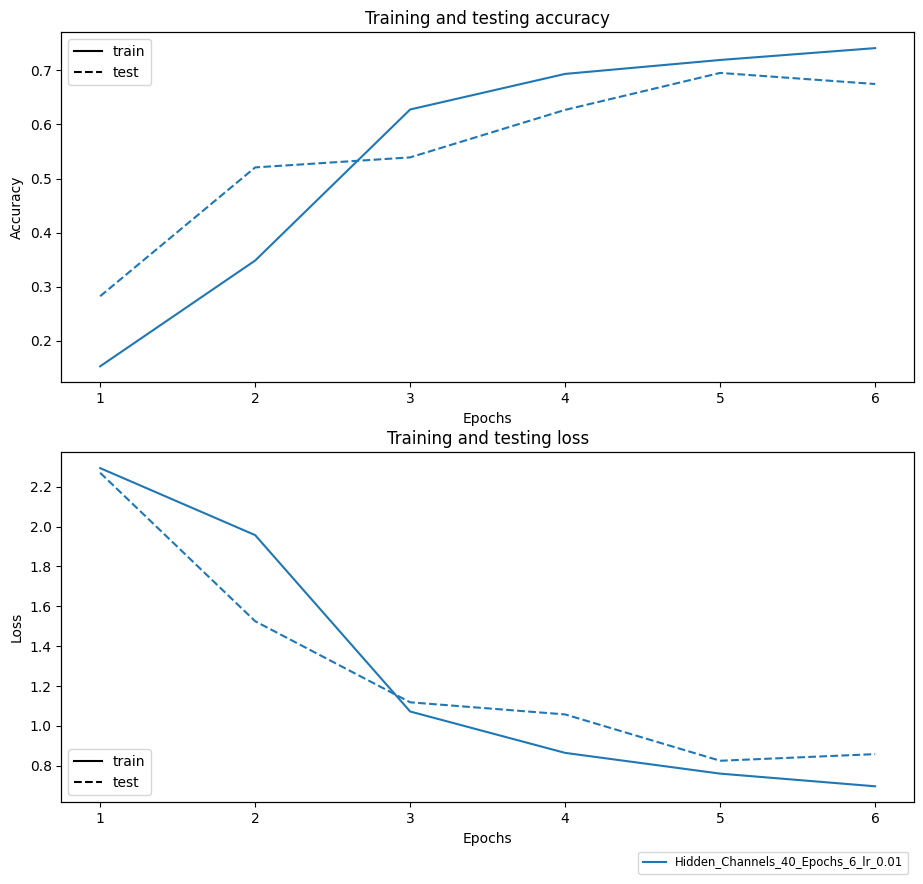

In [4]:
import matplotlib.pyplot as plt 
import pandas as pd
from utils.config import RESULTS_DIRECTORY
import numpy as np
from utils.helpers import retrieve_results
import itertools

resdf = retrieve_results(experiment_name="Test_plots",model_name="TinyVGG_1",extra="Hidden_Channels_40_Epochs_6_lr_0.01")

names = iter(resdf["Label"].unique()) # 1 label per feather file
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = itertools.cycle(colors)

fig,ax = plt.subplots(2,1,figsize=(11,10))

ax0 = ax[0].twinx()
ax0.get_yaxis().set_visible(False)
ax0.get_xaxis().set_visible(False)
ax1 = ax[1].twinx()
ax1.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)

ax[0].set_title("Training and testing accuracy")
ax[1].set_title("Training and testing loss")

ax[0].set_ylabel("Accuracy")
ax[1].set_ylabel("Loss")
ax[0].set_xlabel("Epochs")
ax[1].set_xlabel("Epochs")

#for dataframe in ...########################################################################

col = next(color_cycle)
name = next(names)

ax[0].plot(resdf[["Epoch #"]],resdf[["train_acc"]],'-',color=col,label=name)
ax[0].plot(resdf[["Epoch #"]],resdf[["test_acc"]],'--',color=col) 

ax[1].plot(resdf[["Epoch #"]],resdf[["train_loss"]],'-',color=col,label=name)
ax[1].plot(resdf[["Epoch #"]],resdf[["test_loss"]],'--',color=col)

ax[1].legend(loc=1,fontsize="small",bbox_to_anchor=(1, -0.125)) # Legend for colors in loss

#out of the for##############################################################################


ax0.plot(np.nan,np.nan,'-',label="train",color ='black')
ax0.plot(np.nan,np.nan,'--',label="test",color='black')
ax0.legend(loc=2) # Legend for train test in acc

ax1.plot(np.nan,np.nan,'-',label="train",color ='black') 
ax1.plot(np.nan,np.nan,'--',label="test",color='black')
ax1.legend(loc=3) # Legend for train test in loss

#fig.legend(loc="center")

plt.show()


# PLOT 

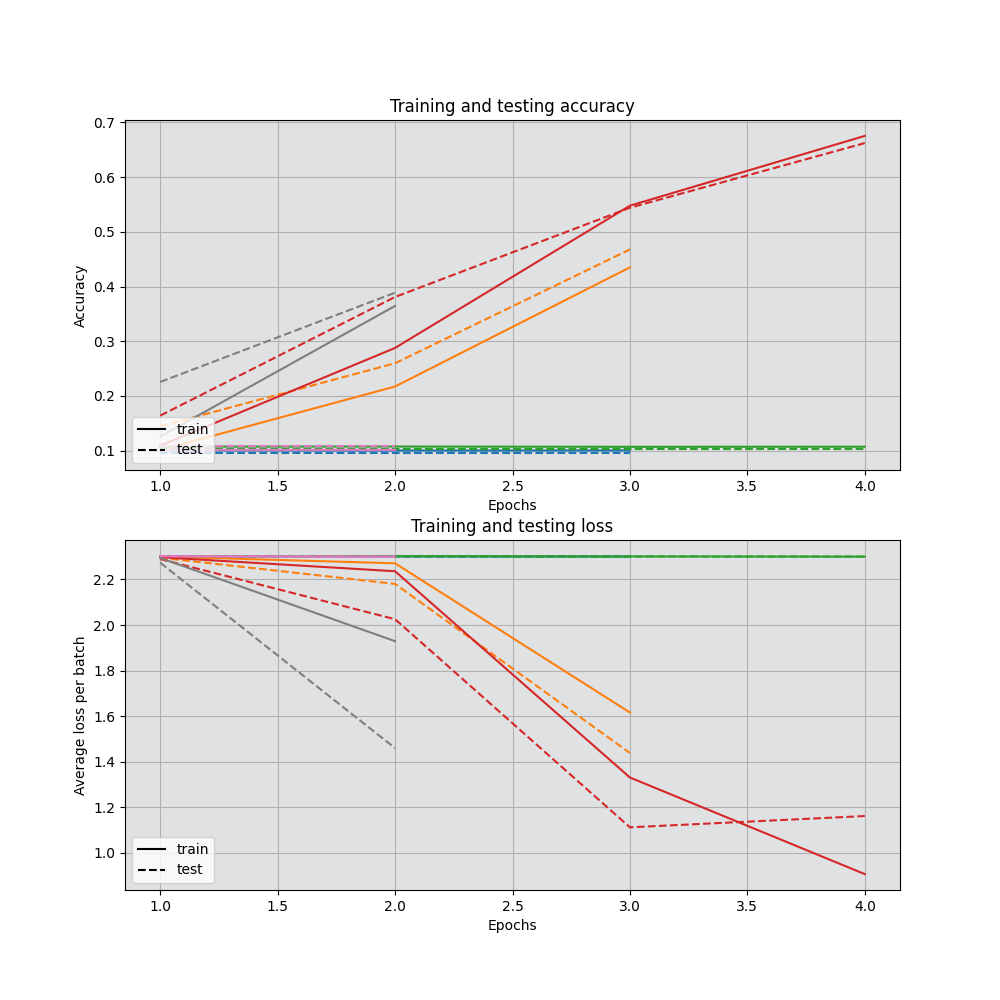

In [2]:
%matplotlib ipympl
from utils.helpers import retrieve_results
from utils.helpers import plot_results

experiment_name = None #"Test_plots"
model_name = None #"TinyVGG_1"
extra = None #"Hidden_Channels_40_Epochs_6_lr_0.01"

#Add functionality to input more than one experimemt name

#Add a toggle for experiment and model names
#No toggle for extra since they are too messy
#But maybe a filter of some kind


resdf = retrieve_results(experiment_name=experiment_name,model_name=model_name,extra=extra)
plot_results(results=resdf,experiment_name=experiment_name,model_name=model_name) # type: ignore

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from shiny.express import ui, input, render

with ui.sidebar():
    ui.input_slider("n", "N", 0, 100, 20)


@render.plot(alt="A histogram")
def histogram():
    np.random.seed(19680801)
    x = 100 + 15 * np.random.randn(437)
    plt.hist(x, input.n(), density=True)


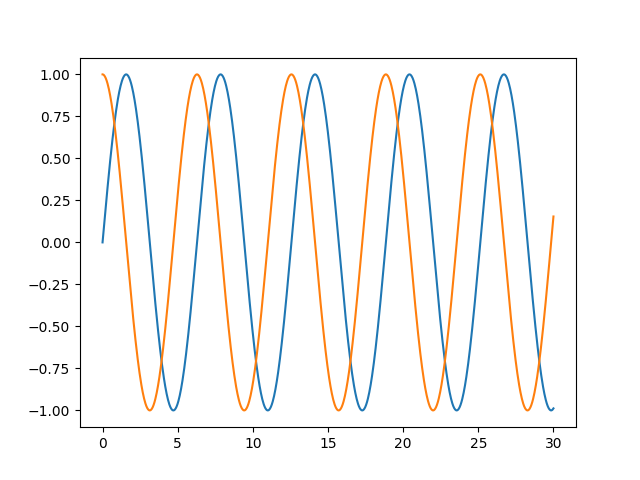

In [ ]:
%matplotlib ipympl
#tkagg opens in new window, just like terminal and it works :)
#ipympl opens in the notebook itself, must install first
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
x = np.linspace(0, 30, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig,ax = plt.subplots()
plt.plot(x,y1,label="sin(x)")
plt.plot(x,y2,label="cos(x)")

def hover(event):
    if event.inaxes is ax:
        selected = [line for line in ax.get_lines() if line.contains(event)[0]]
        handle = []
        if selected != []:
            handle = [mlines.Line2D([], [], color=sel.get_color(), label=sel.get_label()) for sel in selected]
            ax.legend(loc=2,handles=handle)
            fig.canvas.draw_idle()
        if selected == []:
            leg = ax.get_legend()
            leg.set_visible(False)
fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()

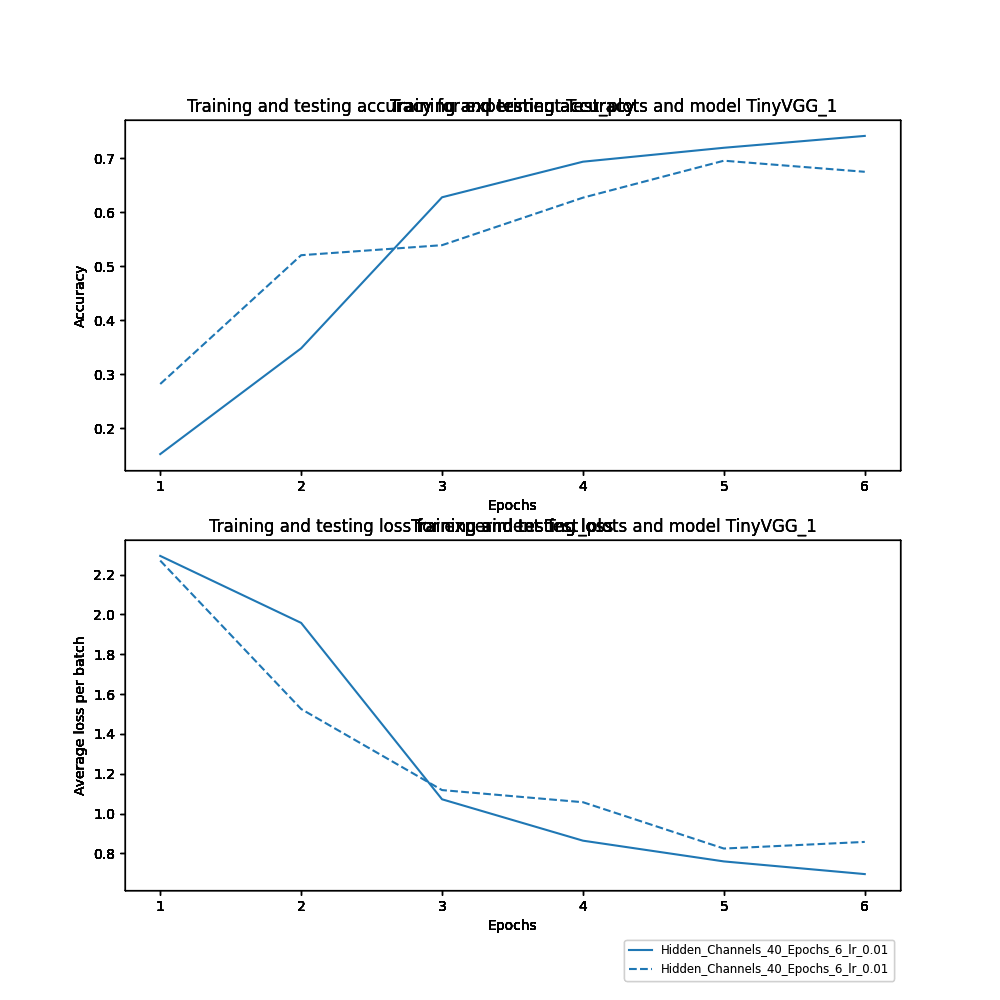

In [25]:
import matplotlib.pyplot as plt 
import pandas as pd
from utils.config import RESULTS_DIRECTORY
import numpy as np
from utils.helpers import retrieve_results
import itertools
import matplotlib.lines as mlines
experiment_name = "Test_plots"
model_name = "TinyVGG_1"
extra = "Hidden_Channels_40_Epochs_6_lr_0.01"

results = retrieve_results(experiment_name=experiment_name,model_name=model_name,extra=extra)

names = iter(results["Label"].unique()) # 1 label per feather file
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = itertools.cycle(colors)

fig,ax = plt.subplots(2,1,figsize=(10,10),num=" ")

ax0 = ax[0].twinx()
ax0.get_yaxis().set_visible(False)
ax0.get_xaxis().set_visible(False)
ax1 = ax[1].twinx()
ax1.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)

ax[0].set_ylabel("Accuracy")
ax[1].set_ylabel("Average loss per batch")
ax[0].set_xlabel("Epochs")
ax[1].set_xlabel("Epochs")

title_acc = "Training and testing accuracy"
title_loss = "Training and testing loss"
# if the experiment name or model name have been specified they will not 
# appear in the label, so we add them to the title
if experiment_name and model_name:
    title_acc += " for experiment "+experiment_name+ " and model "+model_name
    title_loss += " for experiment "+experiment_name+ " and model "+model_name
elif experiment_name:
    title_acc += " for experiment "+experiment_name
    title_loss += " for experiment "+experiment_name
elif model_name:
    title_acc += " for model "+model_name
    title_loss += " for model "+model_name

ax[0].set_title(title_acc)
ax[1].set_title(title_loss)

for label in results["Label"].unique():
    df = results[results["Label"]==label]

    col = next(color_cycle)
    name = next(names)

    ax[0].plot(df[["Epoch #"]],df[["train_acc"]],'-',color=col,label=name)
    ax[0].plot(df[["Epoch #"]],df[["test_acc"]],'--',color=col,label=name) 

    ax[1].plot(df[["Epoch #"]],df[["train_loss"]],'-',color=col,label=name)
    ax[1].plot(df[["Epoch #"]],df[["test_loss"]],'--',color=col,label=name)


#x = np.linspace(0, 30, 1000)
#y1 = np.sin(x)
#y2 = np.cos(x)

#fig,ax = plt.subplots()
#plt.plot(x,y1,label="sin(x)")
#plt.plot(x,y2,label="cos(x)")

def hover(event):
    if event.inaxes is ax[0]:
        selected = [line for line in ax[0].get_lines() if line.contains(event)[0]]
        handle = []
        if selected != []:
            handle = [mlines.Line2D([], [], color=sel.get_color(), label=sel.get_label()) for sel in selected]
            ax[0].legend(loc=3,handles=handle)
            fig.canvas.draw_idle()
        if selected == []:
            leg = ax[0].get_legend()
            leg.set_visible(False)
    elif event.inaxes is ax[1]:
        selected = [line for line in ax[1].get_lines() if line.contains(event)[0]]
        handle = []
        if selected != []:
            handle = [mlines.Line2D([], [], color=sel.get_color(), label=sel.get_label()) for sel in selected]
            ax[1].legend(loc=3,handles=handle)
            fig.canvas.draw_idle()
        if selected == []:
            leg = ax[1].get_legend()
            leg.set_visible(False)

#ax[1].legend(loc=1,fontsize="small",bbox_to_anchor=(1, -0.125)) # Legend for colors in loss

ax0.plot(np.nan,np.nan,'-',label="train",color ='black')
ax0.plot(np.nan,np.nan,'--',label="test",color='black')
#ax0.legend(loc=2) # Legend for train test in acc

ax1.plot(np.nan,np.nan,'-',label="train",color ='black') 
ax1.plot(np.nan,np.nan,'--',label="test",color='black')
#ax1.legend(loc=3) # Legend for train test in loss

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [109]:
subfolders = [ f.name for f in os.scandir(RESULTS_DIRECTORY) if f.is_dir()]
print(subfolders)

['Test_dataframe', 'Test_plots']


In [15]:
resdf.head()

,Hidden_Channels,Epochs,lr,train_loss,train_acc,test_loss,test_acc,Epoch #,Label
0,40,6,0.001,2.300779,0.100233,2.297978,0.124023,1,TinyVGG_1_Hidden_Channels_40_Epochs_6_lr_0.001
1,40,6,0.001,2.298735,0.121177,2.295792,0.135742,2,TinyVGG_1_Hidden_Channels_40_Epochs_6_lr_0.001
2,40,6,0.001,2.296610,0.126828,2.293447,0.159180,3,TinyVGG_1_Hidden_Channels_40_Epochs_6_lr_0.001
3,40,6,0.001,2.294279,0.125997,2.290784,0.182617,4,TinyVGG_1_Hidden_Channels_40_Epochs_6_lr_0.001
4,40,6,0.001,2.291416,0.169215,2.287474,0.191406,5,TinyVGG_1_Hidden_Channels_40_Epochs_6_lr_0.001


In [ ]:
import numpy as np
# To normalize the epochs
big = np.array(np.linspace(1,100,100))
mid = np.linspace(1,20,20)
small = np.array(np.linspace(1,5,5))

small = small * 100/5
mid = mid * 100/20

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

---------------------------------

In [3]:
from utils.helpers import retrieve_metadata

retrieve_metadata(experiment_name="Test_new_metadata",model_name="Model_3",extra="Hidden_Channels_40_Epochs_2_lr_0.001")

{'date': '28-08-2025 13:28',
 'experiment name': 'Test_new_metadata',
 'model name': 'Model_3',
 'learning rate': 0.001,
 'epochs': 2,
 'loss function': 'CrossEntropyLoss',
 'optimizer name': 'SGD',
 'dataset': 'FashionMNIST',
 'training dataset size': 6000,
 'testing dataset size': 1000,
 'batch size': 32,
 'Hyperparams': {'Hidden_Channels': [40], 'Epochs': [2], 'lr': [0.001]},
 'optimizer params': {'lr': 0.001,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False,
  'fused': None},
 'model params': {'layer_1': Sequential(
    (0): Conv2d(1, 40, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  ),
  'layer_2': Sequential(
    (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(40, 40, kernel_size=(3, 3)

In [231]:
type(HYPERPARAMETERS.keys())

dict_keys

In [141]:
from utils.helpers import retrieve_metadata
import pandas as pd
retrieve_metadata(experiment_name="Test_dataframe",model_name="TinyVGG_1",extra="Hidden_Channels_40_Epochs_2_lr_0.01")
dataframe_path = os.path.join(RESULTS_DIRECTORY,"Test_dataframe","TinyVGG_1","Hidden_Channels_40_Epochs_2_lr_0.01")

pd.read_feather(dataframe_path)

PermissionError: [Errno 13] Permission denied: 'c:\\Users\\oriol\\GitHub_Repos\\CNN-classification\\experiment_logs\\results\\Test_dataframe\\TinyVGG_1\\Hidden_Channels_40_Epochs_2_lr_0.01'

In [142]:
A = [1,2,3]
A[:-1]

[1, 2]

In [13]:
#from jupyter_dash import JupyterDash       #Deprecated
import dash
from dash import dcc, html
import plotly.graph_objects as go
from dash import Input, Output

# --- Create the app ---
#app = JupyterDash(__name__)
app = dash.Dash(__name__)

# --- Base figure ---
fig = go.Figure()
fig.add_trace(go.Scatter(x=[0,1,2,3], y=[0,1,4,9], mode="lines", name="Quadratic"))
fig.add_trace(go.Scatter(x=[0,1,2,3], y=[0,1,8,27], mode="lines", name="Cubic"))
fig.add_trace(go.Scatter(x=[0,1,2,3], y=[1,2,4,8], mode="lines", name="Exponential"))

# --- Layout ---
app.layout = html.Div([
    dcc.Checklist(
        id="trace-checklist",
        options=[{"label": t.name, "value": i} for i, t in enumerate(fig.data)],
        value=[0, 1, 2],  # initially visible
        labelStyle={'display': 'block'}
    ),
    dcc.Graph(id="plot", figure=fig)
])

# --- Callback ---
@app.callback(
    Output("plot", "figure"),
    Input("trace-checklist", "value")
)
def update_visibility(visible_idxs):
    for i, trace in enumerate(fig.data):
        trace.visible = i in visible_idxs
    return fig

# --- Run the app in the notebook ---
#app.run(mode='inline', debug=True) #run inline
app.run(jupyter_mode="external",debug=True) #run in a browser tab 

Dash app running on http://127.0.0.1:8050/


In [70]:
import dash
import pandas as pd
from dash.dependencies import Input, Output, State
#import dash_core_components as dcc
#import dash_html_components as html
from dash import dcc
from dash import html
from dash import dash_table
from dash.exceptions import PreventUpdate

# 1) this is needed to use emojis:
# -*- coding: utf-8 -*-

# # table with task and employees
# df_selection = pd.DataFrame(columns = ['Row','Column'])
# 
# df_selection.to_csv('last_selected.csv')

# 2) table with task and employees with unselected boxes
df = pd.DataFrame(columns = ['Task', 'Employee 1', 'Employee 2', 'Employee 3', 'Employee 4', 'Employee 5', 'Employee 6', 'Employee 7',
                             'Employee 8'])
df['Task']= ["Task 1 ", "Task 2", "Task 3", "Task 4"]
df['Employee 1'] = ['⬜','⬜','⬜','⬜']
df['Employee 2'] = ['⬜','⬜','⬜','⬜']
df['Employee 3'] = ['⬜','⬜','⬜','⬜']
df['Employee 4'] = ['⬜','⬜','⬜','⬜']
df['Employee 5'] = ['⬜','⬜','⬜','⬜']
df['Employee 6'] = ['⬜','⬜','⬜','⬜']
df['Employee 7'] = ['⬜','⬜','⬜','⬜']
df['Employee 8'] = ['⬜','⬜','⬜','⬜']
#for emp in ['Employee 1', 'Employee 2', 'Employee 3', 'Employee 4', 'Employee 5', 'Employee 6', 'Employee 7','Employee 8']:
#      df[emp] = [" "," "," "," "]

# create the tables to show the inforamtion:
table = html.Div([
    dash_table.DataTable(
        columns=[{"name": i, "id": i} for i in df.columns],
        data=df.to_dict('records'),
        editable=False,
        style_data_conditional=[
        {'if': {'state': 'active'},'backgroundColor': 'white', 'border': '1px #000000 square'},
        ],
        style_as_list_view= True,
        column_selectable= 'single',
        id='table',
        style_data={"font-size" : "14px", 'width': 15, "background":"white", 'text-align': 'center','border': '1px solid black'},
    )
])

app = dash.Dash(__name__)

# Layout of the page:
app.layout = html.Div([
    html.H2("Employees Tasks"),
    html.H4("All Tasks are empty", id="Message1"),
    html.Div(table, style={'width':'60%'}),
])

# Callbacks
@app.callback(Output("Message1", "children"),
              Output("table", "data"),
              [Input('table', 'active_cell'),
               State('table', 'data')])
def update_loosers(cell, data):
    # If there is not selection:
    if not cell:
        raise PreventUpdate
    else:
        # If the user select a box:
        # 3) takes the info for the row and column selected
        row_selected = cell["row"]
        row_name = data[row_selected]["Task"]
        column_selected =cell["column"]
        column_name =cell["column_id"]
        message = "Check a box"
        
        # 4) Change the figure of the box selected
        if data[row_selected][column_name] == '✅':
                data[row_selected][column_name] = '⬜'
                message = "The "+row_name+" of the "+column_name+" has been unselected"
                 
        elif data[row_selected][column_name] == '⬜':
                  data[row_selected][column_name] = '✅'
                  message = "The "+row_name+" of the "+column_name+" has been completed"

        return message, data
   

if __name__ == "__main__":
    app.run(debug=True)


# Example
# To make a good looking checkbox you can also make a table and change the color of particular cells to simulate checking


In [75]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt 

app = Dash()

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "Price": [0.85, 0.91, 0.67, 1.12, 1.04, 0.99]
})

fig = px.line(df, x="Amount", y="Price", color="Fruit")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run(debug=True)

In [54]:
from dash import Dash, dcc, html, Input, Output, callback

app = Dash()

app.layout = html.Div(children=[
    html.H6("Change the value in the text box to see callbacks in action!"),
    html.Div([
        "Input: ",
        dcc.Input(id='my-input', value='initial value', type='text', style={'backgroundColor':"#350086"})
    ]),
    html.Br(),
    html.Div(id='my-output'),

],
style={"backgroundColor":"#000000","color":"#1292B9","textAlign":'center'})


@callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)
def update_output_div(input_value):
    return f'Output: {input_value}'


if __name__ == '__main__':
    app.run(debug=True)

In [57]:
import matplotlib.pyplot as plt
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [3]:
shiny_path = Path.cwd().parent / "dashboard_app" / "app.py"
print(shiny_path)

c:\Users\oriol\GitHub_Repos\CNN-classification\dashboard_app\app.py


In [ ]:
#!shiny run --reload --launch-browser shiny_path

^C


In [41]:
from utils.helpers import retrieve_results
resdf = retrieve_results()

In [53]:
exps = ["New_model","Test_new_plots_2"]
mods = ["Model_2","TinyVGG_1"]
resdf["A space"] = [0]*(int(len(resdf)/2)) + [1]*(int(len(resdf)/2))
filtered_df = resdf.query(f"Experiment_name == {exps} & Model_name == {mods}")
filtered_df.head(100)

,Hidden_Channels,Epochs,lr,train_loss,train_acc,test_loss,test_acc,Epoch #,Experiment_name,Model_name,Extra,ID,Coolness,A space
0,30,2,0.010,2.291048,0.094249,2.268696,0.102539,1,New_model,Model_2,Hidden_Channels_30_Epochs_2_lr_0.01,0,NaN,0
1,30,2,0.010,1.867279,0.354222,2.126062,0.426758,2,New_model,Model_2,Hidden_Channels_30_Epochs_2_lr_0.01,0,NaN,0
26,30,2,0.001,2.303408,0.098404,2.303097,0.095703,1,Test_new_plots_2,TinyVGG_1,Hidden_Channels_30_Epochs_2_lr_0.001,11,NaN,1
27,30,2,0.001,2.302819,0.100399,2.302643,0.095703,2,Test_new_plots_2,TinyVGG_1,Hidden_Channels_30_Epochs_2_lr_0.001,11,NaN,1
28,30,2,0.010,2.298944,0.112699,2.292933,0.221680,1,Test_new_plots_2,TinyVGG_1,Hidden_Channels_30_Epochs_2_lr_0.01,12,NaN,1
29,30,2,0.010,2.277938,0.313830,2.231981,0.333008,2,Test_new_plots_2,TinyVGG_1,Hidden_Channels_30_Epochs_2_lr_0.01,12,NaN,1
30,30,3,0.001,2.302327,0.098737,2.302814,0.087891,1,Test_new_plots_2,TinyVGG_1,Hidden_Channels_30_Epochs_3_lr_0.001,13,NaN,1
31,30,3,0.001,2.301661,0.099069,2.302162,0.087891,2,Test_new_plots_2,TinyVGG_1,Hidden_Channels_30_Epochs_3_lr_0.001,13,NaN,1
32,30,3,0.001,2.301085,0.103059,2.301562,0.112305,3,Test_new_plots_2,TinyVGG_1,Hidden_Channels_30_Epochs_3_lr_0.001,13,NaN,1
33,30,3,0.010,2.294762,0.203624,2.276953,0.206055,1,Test_new_plots_2,TinyVGG_1,Hidden_Channels_30_Epochs_3_lr_0.01,14,NaN,1


`print`

In [ ]:
# Change the available models based on the selected experiments
@reactive.effect
def update_models():
    print("UPDATING MODELS")
    filtered_models = results.query(f"Experiment_name == {input.exp_ch()}")
    choices={}
    #selected=[]
    for exp in filtered_models["Model_name"].unique():
        choices.update({f"{exp}":f"{exp}"})
        # key and value are the same since input.exp_ch returns
        # the keys that are selected
        # selected.append(f"{exp}")
    #results["Model_name"][results["Experiment_name"] in input.exp_ch()].unique()
    ui.update_checkbox_group(id="mod_ch",
                             choices=choices,
                             selected=input.mod_ch())

In [55]:
hoverlabel=dict(font=dict(color="rgba(0,0,0,0.8)"))
print(hoverlabel)

{'font': {'color': 'rgba(0,0,0,0.8)'}}


In [ ]:
from utils.config import MAIN_DIRECTORY
from pathlib import Path
app_path = Path(MAIN_DIRECTORY) / "dasboard_app" / "app.py"
#!shiny run --reload --launch-browser app_path
#Runs but does nothing

^C


In [ ]:
import plotly.colors as pc
import itertools
colors = pc.qualitative.Dark24  # pick a color cycle
itc = iter(colors)
next(itc)

'#636EFA'

In [ ]:
"#636EFA"

In [ ]:
from utils.engine import train
from utils.model_architectures import TinyVGG_1
from utils.data_loaders import create_train_test_dataloaders
from torch import nn
from utils.helpers import create_writer
from utils.helpers import create_dataframe
from utils.helpers import hyperparameter_combinations
from utils.helpers import save_dataframe
from utils.helpers import create_and_save_experiment_metadata

device = "cuda" if torch.cuda.is_available() else "cpu"

HYPERPARAMETERS = {'Hidden_Channels': [30],
                   'Epochs': [2],
                   'lr': [0.01, 0.001],
                   'Iter': [3] #Only 1 value
                   }

experiment_name = "New_model_2"
hp_combinations = hyperparameter_combinations(HYPERPARAMETERS)

for n,combination in enumerate(hp_combinations):
    
    HIDDEN_CHANNELS = combination[list(HYPERPARAMETERS).index("Hidden_Channels")]
    NUM_EPOCHS = combination[list(HYPERPARAMETERS).index("Epochs")]
    LR = combination[list(HYPERPARAMETERS).index("lr")]
    ITER = combination[list(HYPERPARAMETERS).index("Iter")]

    train_dataloader, test_dataloader = create_train_test_dataloaders(size=0.1) #type: ignore

    model_0 = TinyVGG_1(input_shape=1,hidden_channels=HIDDEN_CHANNELS,output_shape=10).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(params=model_0.parameters(),lr=LR)
    #model_name = model_0._get_name()
    model_name = "Model_3"

    extra = ""
    namelist = [str(key)+"_"+str(val)+"_" for key,val in zip(HYPERPARAMETERS.keys(),combination)]
    for elem in namelist:
        extra += elem
    extra = extra[:-1]

    # Train the model for a number of epochs and log the results to tensorboard
    results = train(model=model_0,
                    train_dataloader=train_dataloader,
                    test_dataloader=test_dataloader,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    epochs=NUM_EPOCHS,
                    iters=ITER,
                    )
    # Store the results of the accuracy and loss as a dataframe
    df = create_dataframe(results=results,
                          hyperparameters_tuple=combination,
                          hyperparameters_keys=HYPERPARAMETERS.keys())
    

Iteration 1


  0%|          | 0/2 [00:00<?, ?it/s]

Iteration 2


  0%|          | 0/2 [00:00<?, ?it/s]

Iteration 3


  0%|          | 0/2 [00:00<?, ?it/s]

Iteration 1


  0%|          | 0/2 [00:00<?, ?it/s]

Iteration 2


  0%|          | 0/2 [00:00<?, ?it/s]

Iteration 3


  0%|          | 0/2 [00:00<?, ?it/s]

In [31]:
df[df["Iter #"]==1]

,Hidden_Channels,Epochs,lr,Iter,train_loss,train_acc,test_loss,test_acc,Epoch #,Iter #
0,30,2,0.001,3,2.302893,0.098570,2.302402,0.092773,1,1
1,30,2,0.001,3,2.302408,0.098404,2.301959,0.092773,2,1


In [44]:
try:
    num_iter = df["BABA"].max()
except KeyError:
    num_iter=1

In [45]:
for n in range(num_iter):
    for m in range(3):
        print(n,m)

0 0
0 1
0 2


1
Noppity nope


In [3]:
from utils.helpers import retrieve_results
res = retrieve_results()

In [4]:
res

,Hidden_Channels,Epochs,lr,train_loss,train_acc,test_loss,test_acc,Epoch #,Experiment_name,Model_name,Extra,ID,Coolness,Iter,Iter #
0,30,2,0.010,2.291048,0.094249,2.268696,0.102539,1,New_model,Model_2,Hidden_Channels_30_Epochs_2_lr_0.01,0,NaN,NaN,NaN
1,30,2,0.010,1.867279,0.354222,2.126062,0.426758,2,New_model,Model_2,Hidden_Channels_30_Epochs_2_lr_0.01,0,NaN,NaN,NaN
2,30,2,0.010,2.297406,0.098238,2.285579,0.118164,1,New_model_2,Model_3,Hidden_Channels_30_Epochs_2_lr_0.01,1,NaN,NaN,NaN
3,30,2,0.010,2.142801,0.212267,2.151251,0.318359,2,New_model_2,Model_3,Hidden_Channels_30_Epochs_2_lr_0.01,1,NaN,NaN,NaN
4,30,2,0.010,2.286270,0.193318,2.249859,0.331055,1,New_model_2,Model_3,Hidden_Channels_30_Epochs_2_lr_0.01_Coolness_100,2,100.0,NaN,NaN
5,30,2,0.010,1.778535,0.457779,1.573034,0.470703,2,New_model_2,Model_3,Hidden_Channels_30_Epochs_2_lr_0.01_Coolness_100,2,100.0,NaN,NaN
6,30,2,0.010,2.297169,0.183677,2.288259,0.347656,1,Test_Iter,TinyVGG_1,Hidden_Channels_30_Epochs_2_lr_0.01_Iter_3,3,NaN,3.0,1.0
7,30,2,0.010,2.214333,0.356882,1.877707,0.417969,2,Test_Iter,TinyVGG_1,Hidden_Channels_30_Epochs_2_lr_0.01_Iter_3,3,NaN,3.0,1.0
8,30,2,0.010,1.274856,0.556516,1.005736,0.630859,1,Test_Iter,TinyVGG_1,Hidden_Channels_30_Epochs_2_lr_0.01_Iter_3,3,NaN,3.0,2.0
9,30,2,0.010,0.857129,0.685838,0.848635,0.670898,2,Test_Iter,TinyVGG_1,Hidden_Channels_30_Epochs_2_lr_0.01_Iter_3,3,NaN,3.0,2.0


In [12]:
res.dtypes

Hidden_Channels      int64
Epochs               int64
lr                 float64
train_loss         float64
train_acc          float64
test_loss          float64
test_acc           float64
Epoch #              int64
Experiment_name     object
Model_name          object
Extra               object
ID                   int64
Coolness           float64
Iter               float64
Iter #             float64
dtype: object

In [13]:
res = res.astype({"Iter": int, "Iter #": int})


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'Iter'

In [27]:
res["Iter #"][0]


np.float64(nan)

In [ ]:
import numpy as np
np.nan

nan

In [28]:

namelist = [str(key)+"_"+str(val)+"_" for key,val in zip(HYPERPARAMETERS.keys(),combination)]

In [29]:
namelist

['Hidden_Channels_30_', 'Epochs_2_', 'lr_0.01_', 'Iter_3_']

In [84]:
sss = "Iter_4_Hidden_Channels_30_Epochs_2_Epochs_2_Iter_3"

In [73]:
sss.split("_").index("Iter")

7

In [86]:
import re
txt = "The rain in Spain"
x = re.sub("Iter_[0-9]+","", txt)
x = re.sub("_$","", x)
x = re.sub("^_","", x)
print(x) 

The rain in Spain
